In [1]:
%matplotlib inline
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



keypoint_names: ['nose_tip', 'jaw', 'tongue_tip_right', 'tongue_tip_center', 'tongue_tip_left', 'pointer_finger_r', 'paw_wrist_r', 'pointer_finger_l', 'paw_wrist_l', 'spout_r', 'spout_l'], 11
Average error: 3.78 ± 5.24 pixel


/tmp/ipykernel_14931/315718624.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


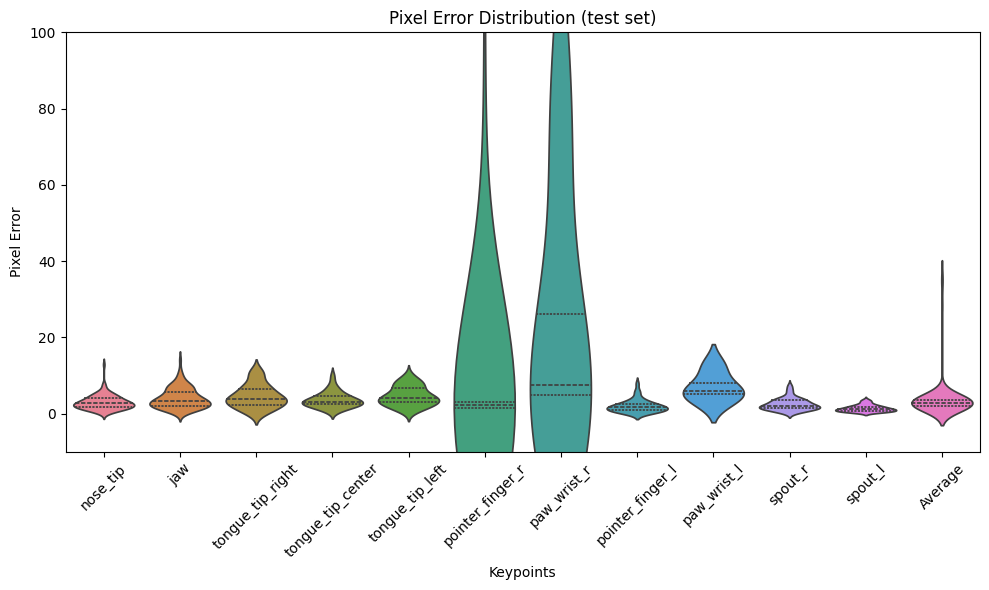

                  mean_pix_error
nose_tip             3.01 ± 1.88
jaw                  4.13 ± 2.67
tongue_tip_right     4.59 ± 2.97
tongue_tip_center    3.67 ± 2.02
tongue_tip_left      4.65 ± 2.50
pointer_finger_r   17.65 ± 61.67
paw_wrist_r        23.41 ± 31.37
pointer_finger_l     2.03 ± 1.63
paw_wrist_l          7.02 ± 3.31
spout_r              2.52 ± 1.58
spout_l              1.44 ± 0.86
Average              3.78 ± 5.24


In [2]:
def summarize_pixel_error(filepath, plot_style='line', subset='test'):
    """
    Load pixel error CSV and summarize mean ± std dev per keypoint and across all keypoints.
    Optionally plots pixel error over frames, with subset control.

    Parameters:
    -----------
    filepath : str
        Path to CSV file containing pixel error values per frame.
    plot_style : str, optional
        Type of plot to show: 'line', 'box', or 'violin'. Default is 'line'.
    subset : str, optional
        Which subset to analyze: 'train', 'validation', 'test', 'val+test', or 'all'.
        Default is 'test'.

    Returns:
    --------
    mean_pix : pd.DataFrame
        DataFrame of mean ± std dev pixel error per keypoint and averaged across keypoints.
    """
    df = pd.read_csv(filepath)

    # Subset selection
    if subset == 'test':
        df = df[df['set'] == 'test']
    elif subset == 'train':
        df = df[df['set'] == 'train']
    elif subset == 'validation':
        df = df[df['set'] == 'validation']
    elif subset == 'val+test':
        df = df[df['set'].isin(['validation', 'test'])]
    elif subset == 'all':
        pass  # no filtering
    else:
        raise ValueError(f"Invalid subset '{subset}'. Choose from 'train', 'validation', 'test', 'val+test', 'all'.")

    # Keypoints list
    keypoint_names = list(df.columns[1:-1])  # assuming 1st col is frame/time, last is 'set'
    print(f"\nkeypoint_names: {keypoint_names}, {len(keypoint_names)}")

    # Calculate mean ± std dev
    temp_list = []
    for col in keypoint_names:
        col_values = df[col].astype(float)
        mean = np.nanmean(col_values)
        stdev = np.nanstd(col_values)
        temp_list.append("{:.2f} ± {:.2f}".format(mean, stdev))

    # Add 'Average' across keypoints per frame
    df_values = df[keypoint_names].astype(float)
    df['Average'] = df_values.mean(axis=1)
    mean_all = np.nanmean(df['Average'])
    stdev_all = np.nanstd(df['Average'])
    temp_list.append("{:.2f} ± {:.2f}".format(mean_all, stdev_all))
    print("Average error: {:.2f} ± {:.2f} pixel".format(mean_all, stdev_all))

    # Build summary table
    mean_pix = pd.DataFrame({'mean_pix_error': temp_list})
    keypoint_names.append('Average')
    mean_pix.index = keypoint_names

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_data = df[keypoint_names]  # Includes 'Average'

    if plot_style == 'line':
        sns.lineplot(data=plot_data.drop('Average', axis=1), ax=ax, palette='tab10')
        sns.lineplot(data=df['Average'], ax=ax, color='red', label='Average', linewidth=2)
        ax.set_title(f"Pixel Error Across Frames ({subset} set)")
        ax.set_xlabel("Frame Index")
        ax.set_ylabel("Pixel Error")
    elif plot_style == 'box':
        sns.boxplot(data=plot_data, ax=ax)
        ax.set_title(f"Pixel Error Distribution ({subset} set)")
        ax.set_xlabel("Keypoints")
        ax.set_ylabel("Pixel Error")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    elif plot_style == 'violin':
        sns.violinplot(data=plot_data, ax=ax, inner='quartile')
        ax.set_title(f"Pixel Error Distribution ({subset} set)")
        ax.set_xlabel("Keypoints")
        ax.set_ylabel("Pixel Error")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        print(f"Plot style '{plot_style}' not recognized. Use 'line', 'box', or 'violin'.")

    plt.ylim(-10, 100)
    plt.tight_layout()
    plt.show()

    return mean_pix


mean_pix_table = summarize_pixel_error(
    '/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/outputs/predictions_pixel_error.csv',
    plot_style='violin'  # 'line' or 'box' or 'violin'
)
print(mean_pix_table)


keypoint_names: ['nose_tip', 'jaw', 'tongue_tip_right', 'tongue_tip_center', 'tongue_tip_left', 'pointer_finger_r', 'paw_wrist_r', 'pointer_finger_l', 'paw_wrist_l', 'spout_r', 'spout_l'], 11
Average error: 3.78 ± 5.24 pixel


/tmp/ipykernel_20602/3682230608.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


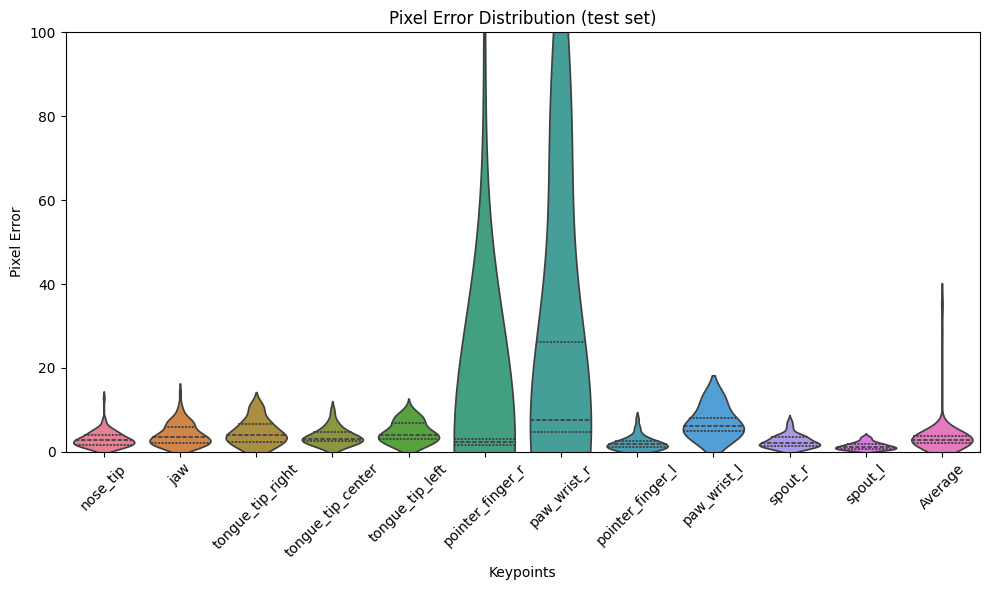

                  mean_pix_error
nose_tip             3.01 ± 1.88
jaw                  4.13 ± 2.67
tongue_tip_right     4.59 ± 2.97
tongue_tip_center    3.67 ± 2.02
tongue_tip_left      4.65 ± 2.50
pointer_finger_r   17.65 ± 61.67
paw_wrist_r        23.41 ± 31.37
pointer_finger_l     2.03 ± 1.63
paw_wrist_l          7.02 ± 3.31
spout_r              2.52 ± 1.58
spout_l              1.44 ± 0.86
Average              3.78 ± 5.24

keypoint_names: ['nose_tip', 'jaw', 'tongue_tip_right', 'tongue_tip_center', 'tongue_tip_left', 'pointer_finger_r', 'paw_wrist_r', 'pointer_finger_l', 'paw_wrist_l', 'spout_r', 'spout_l'], 11
Average error: 3.44 ± 3.97 pixel


/tmp/ipykernel_20602/3682230608.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


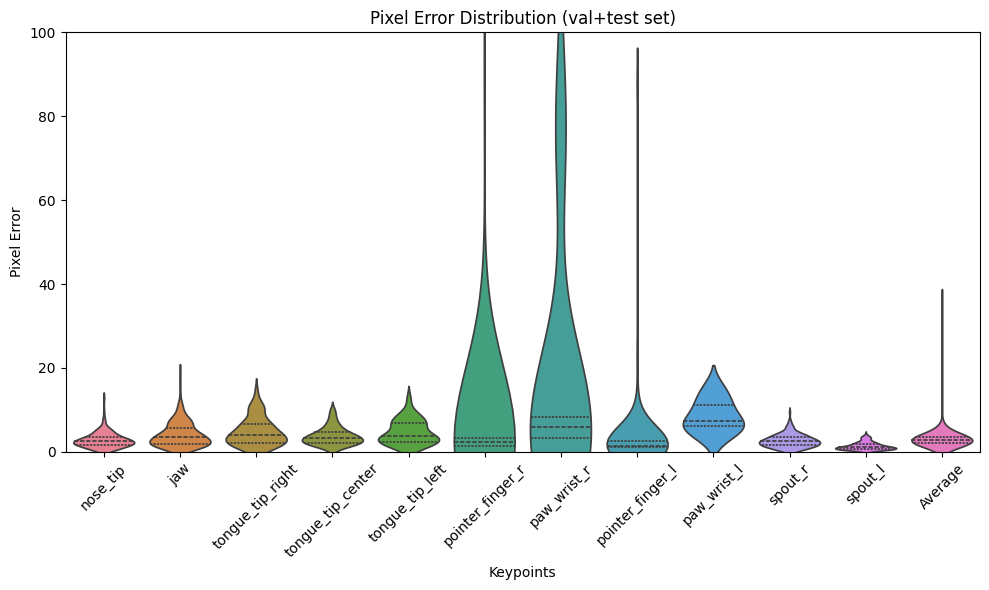

                  mean_pix_error
nose_tip             2.83 ± 1.79
jaw                  4.16 ± 2.92
tongue_tip_right     4.81 ± 3.27
tongue_tip_center    3.78 ± 2.10
tongue_tip_left      4.75 ± 2.87
pointer_finger_r   10.00 ± 43.79
paw_wrist_r        15.41 ± 25.50
pointer_finger_l    3.42 ± 10.12
paw_wrist_l          8.57 ± 3.73
spout_r              2.69 ± 1.58
spout_l              1.41 ± 0.90
Average              3.44 ± 3.97

keypoint_names: ['nose_tip', 'jaw', 'tongue_tip_right', 'tongue_tip_center', 'tongue_tip_left', 'pointer_finger_r', 'paw_wrist_r', 'pointer_finger_l', 'paw_wrist_l', 'spout_r', 'spout_l'], 11
Average error: 2.03 ± 2.04 pixel


/tmp/ipykernel_20602/3682230608.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


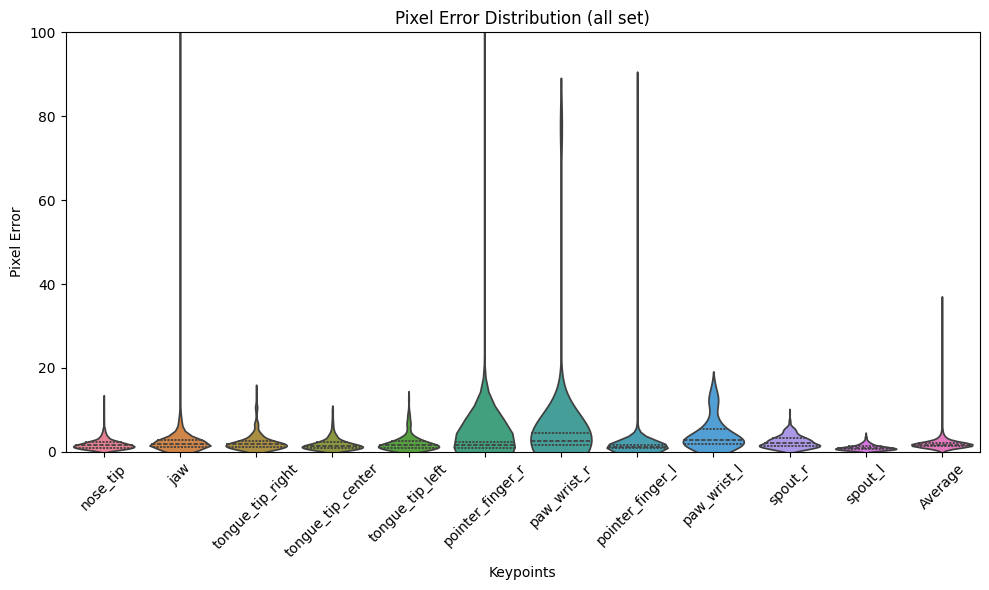

                  mean_pix_error
nose_tip             1.78 ± 1.21
jaw                  2.42 ± 3.95
tongue_tip_right     2.32 ± 2.11
tongue_tip_center    1.86 ± 1.52
tongue_tip_left      2.16 ± 2.01
pointer_finger_r    3.48 ± 20.65
paw_wrist_r         4.95 ± 11.94
pointer_finger_l     1.65 ± 4.66
paw_wrist_l          4.25 ± 3.79
spout_r              2.42 ± 1.51
spout_l              1.04 ± 0.67
Average              2.03 ± 2.04


In [3]:
# Analyze just the test set (default)
mean_pix_table = summarize_pixel_error(
    '/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/outputs/predictions_pixel_error.csv',
    plot_style='violin'
)
print(mean_pix_table)

# Analyze validation + test together
mean_pix_table_valtest = summarize_pixel_error(
    '/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/outputs/predictions_pixel_error.csv',
    plot_style='violin',
    subset='val+test'
)
print(mean_pix_table_valtest)

# Analyze all data
mean_pix_table_all = summarize_pixel_error(
    '/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/outputs/predictions_pixel_error.csv',
    plot_style='violin',
    subset='all'
)
print(mean_pix_table_all)


In [2]:
import pandas as pd

# 1) file paths
gt_path   = "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/CollectedData.masked.csv"
pred_path = "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/outputs/predictions.csv"

# 2) read with skiprows & two-row header
gt = pd.read_csv(gt_path,
                 skiprows=[0],        # drop the “scorer” line
                 header=[0, 1],       # use the next two lines as a MultiIndex
                 index_col=0)         # image path becomes the index

pr = pd.read_csv(pred_path,
                 skiprows=[0],
                 header=[0, 1],
                 index_col=0)

# 3) pull the “set” info cleanly from predictions
set_series = pr.iloc[:, -1].copy()    # save last column (the set labels)
pr = pr.iloc[:, :-1]                  # drop the last column from pr
pr[("set", "")] = set_series           # reinsert it under a clean MultiIndex

# 4) flatten each MultiIndex to simple strings
def flatten(df):
    flat_cols = []
    for bp, coord in df.columns:
        if bp == "set":
            flat_cols.append("set")
        else:
            flat_cols.append(f"{bp}_{coord}")
    df_flat = df.copy()
    df_flat.columns = flat_cols
    return df_flat

gt_flat = flatten(gt)
pr_flat = flatten(pr)

# 5) bring image_path back as a column
gt_flat = gt_flat.reset_index().rename(columns={"index": "image_path"})
pr_flat = pr_flat.reset_index().rename(columns={"index": "image_path"})



In [3]:
# get pixel error df
pix_path = '/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/outputs/predictions_pixel_error.csv'

pix_error = pd.read_csv(pix_path, header=0)
# Rename the first (unnamed) column to image_path
pix_error = pix_error.rename(columns={pix_error.columns[0]: "image_path"})
#rename to add the suffix
error_cols = [c for c in pix_error.columns if c not in ("image_path","set")]
rename_dict = {c: f"{c}_pix_error" for c in error_cols}
pix_error = pix_error.rename(columns=rename_dict)


In [15]:
#merge GT & pred for direct comparison
merged = gt_flat.merge(pr_flat,
                       on="image_path",
                       suffixes=("_gt", "_pr"))


merged_with_error = merged.merge(
    pix_error,
    on="image_path",
    how="left",        # left join keeps all your merged rows, NaN where no error
    validate="one_to_one"
)

assert (merged_with_error["set_x"] == merged_with_error["set_y"]).all()
merged_with_error = merged_with_error.drop(columns="set_y").rename(columns={"set_x":"set"})


# merged_test = merged[merged["set"] == "test"]


In [ ]:

plotting_df = merged_test


# 1) Where your images actually live on disk:
#    merged.image_path contains strings like "labeled-data/…"
base_dir = "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17"

# 2) Figure out which keypoints you have by scanning for the "_x_gt" columns
kp_names = sorted({col[:-5] for col in merged.columns if col.endswith("_x_gt")})

# 3) Loop over the first 10 frames
for idx, row in plotting_df.head(10).iterrows():
    # load image
    img_rel = row["image_path"]
    img_path = os.path.join(base_dir, img_rel)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Couldn’t load {img_path}, skipping")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)

    # plot every keypoint
    for i, kp in enumerate(kp_names):
        x_gt = row[f"{kp}_x_gt"]
        y_gt = row[f"{kp}_y_gt"]
        x_pr = row[f"{kp}_x_pr"]
        y_pr = row[f"{kp}_y_pr"]
        # Ground truth
        ax.scatter(x_gt, y_gt,
                   s=50,
                   edgecolor="white",
                   facecolor="lime",
                   linewidth=1.5,
                   label="GT" if i==0 else "",
                   alpha=0.8)
        # Prediction
        ax.scatter(x_pr, y_pr,
                   s=30,
                   marker="x",
                   label="Pred" if i==0 else "",
                   c="red",
                   alpha=0.8)

    ax.set_title(f"Frame {idx}: {img_rel}", fontsize=8)
    ax.axis("off")

    # only show legend once
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc="upper right")

    plt.tight_layout()
    plt.show()


In [ ]:

plotting_df = merged_test


# 1) Where your images actually live on disk:
#    merged.image_path contains strings like "labeled-data/…"
base_dir = "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17"

# 2) Figure out which keypoints you have by scanning for the "_x_gt" columns
kp_names = sorted({col[:-5] for col in merged.columns if col.endswith("_x_gt")})

# 3) Loop over the first 10 frames
for idx, row in plotting_df.head(10).iterrows():
    # load image
    img_rel = row["image_path"]
    img_path = os.path.join(base_dir, img_rel)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Couldn’t load {img_path}, skipping")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)

    # plot every keypoint
    for i, kp in enumerate(kp_names):
        x_gt = row[f"{kp}_x_gt"]
        y_gt = row[f"{kp}_y_gt"]
        x_pr = row[f"{kp}_x_pr"]
        y_pr = row[f"{kp}_y_pr"]
        
        # plot GT if present
        if pd.notna(x_gt) and pd.notna(y_gt):
            ax.scatter(
                x_gt, y_gt,
                s=50, edgecolor="white", facecolor="lime",
                linewidth=1.5, label="GT" if i==0 else "", alpha=0.8
            )
            # only plot prediction when GT exists
            ax.scatter(
                x_pr, y_pr,
                s=30, marker="x", c="red",
                label="Pred" if i==0 else "", alpha=0.8
            )

    ax.set_title(f"Frame {idx}: {img_rel}", fontsize=8)
    ax.axis("off")

    # only show legend once
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc="upper right")

    plt.tight_layout()
    plt.show()


In [39]:
import numpy as np
# ── assume you already have your merged DataFrame ──
# merged: columns include
#   image_path, set,
#   <kp>_x_gt, <kp>_y_gt,
#   <kp>_x_pr, <kp>_y_pr,
#   <kp>_likelihood_pr

# 1) find all keypoint base‐names
kp_names = sorted([col[:-5] for col in merged.columns if col.endswith("_x_gt")])

# 2) build up a dict of arrays
data = {
    "image_path": merged["image_path"],
    "set":         merged["set"]
}

for kp in kp_names:
    # differences
    dx = merged[f"{kp}_x_pr"] - merged[f"{kp}_x_gt"]
    dy = merged[f"{kp}_y_pr"] - merged[f"{kp}_y_gt"]
    # Euclidean error (NaN if either x_gt or y_gt is NaN)
    data[f"{kp}_error"]       = np.sqrt(dx**2 + dy**2)
    # likelihood from predictions
    data[f"{kp}_likelihood"] = merged[f"{kp}_likelihood"]

# 3) assemble into a new DataFrame
error_df = pd.DataFrame(data)




In [12]:
# ── 1) Build long‐form DataFrame ──
# kp_names are all keypoint bases in error_df
kp_names = sorted([c[:-6] for c in error_df.columns if c.endswith("_error")])

long_list = []
for kp in kp_names:
    tmp = error_df[['image_path', 'set', f'{kp}_error', f'{kp}_likelihood']].copy()
    tmp = tmp.rename(columns={f'{kp}_error':'error',
                              f'{kp}_likelihood':'likelihood'})
    tmp['keypoint'] = kp
    long_list.append(tmp)

long_df = pd.concat(long_list, ignore_index=True)

NameError: name 'long_df' is not defined

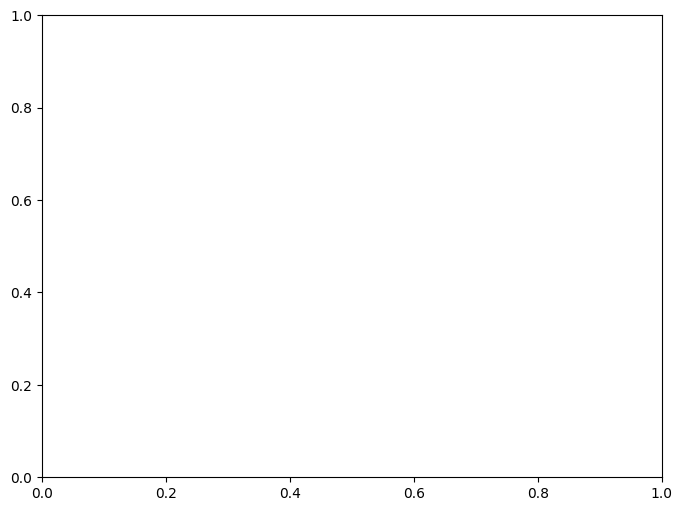

In [19]:
import seaborn as sns
plt.subplots(figsize=(8,6))

sns.scatterplot(data=long_df,
                x='likelihood',
                y='error',
                hue='set',
                alpha=0.2,
                edgecolor=None)
plt.xlim(0, 1.0)
plt.ylim(0, 25)

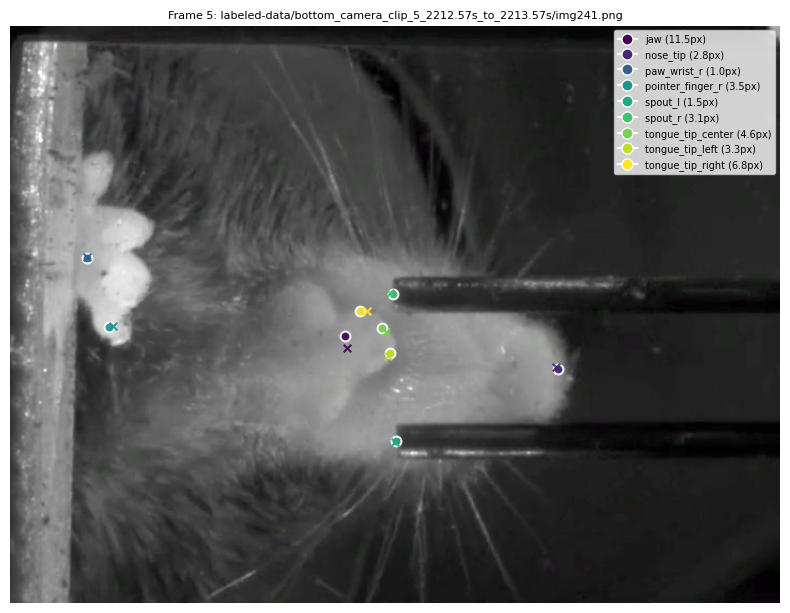

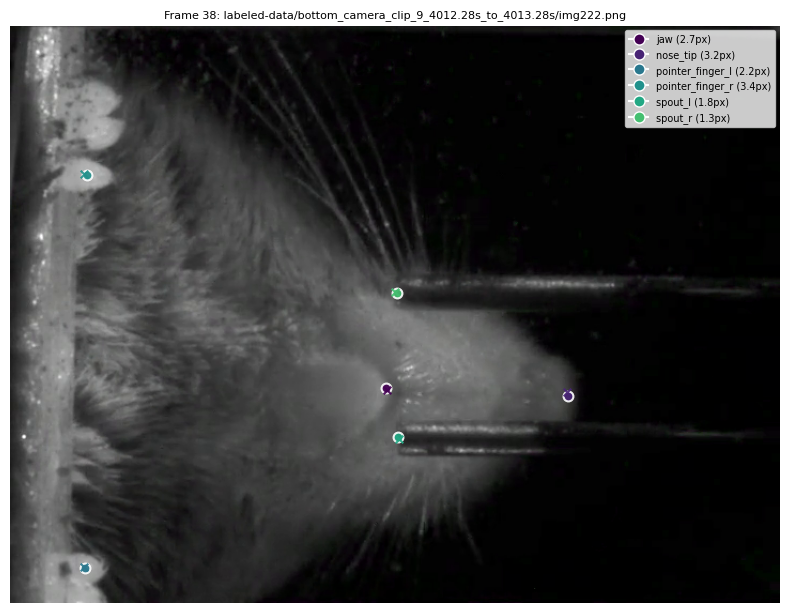

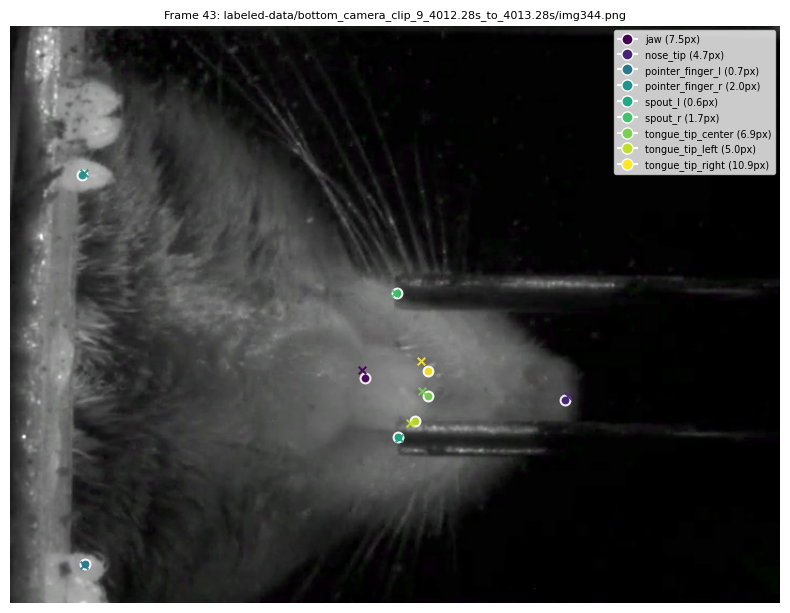

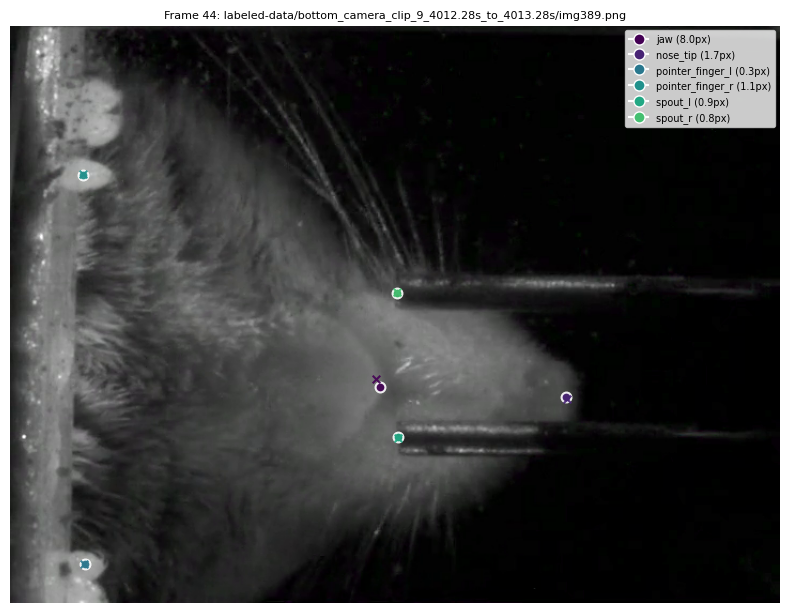

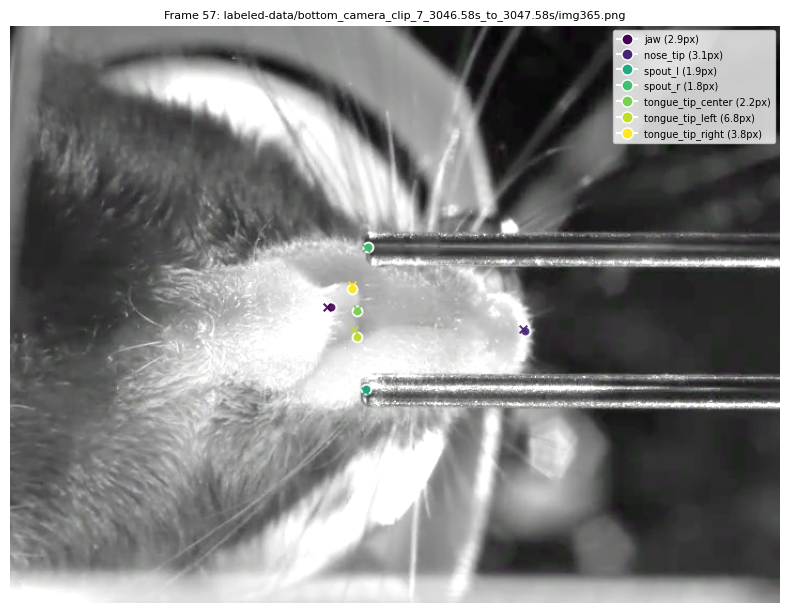

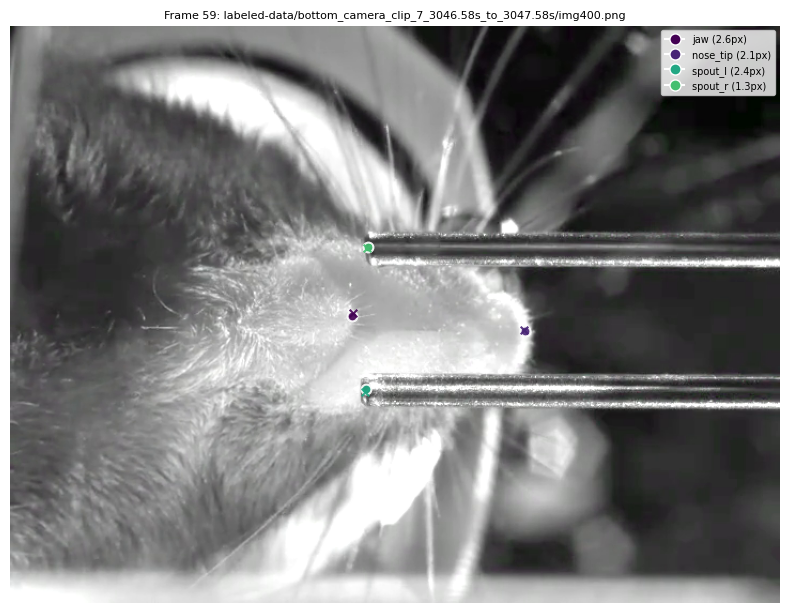

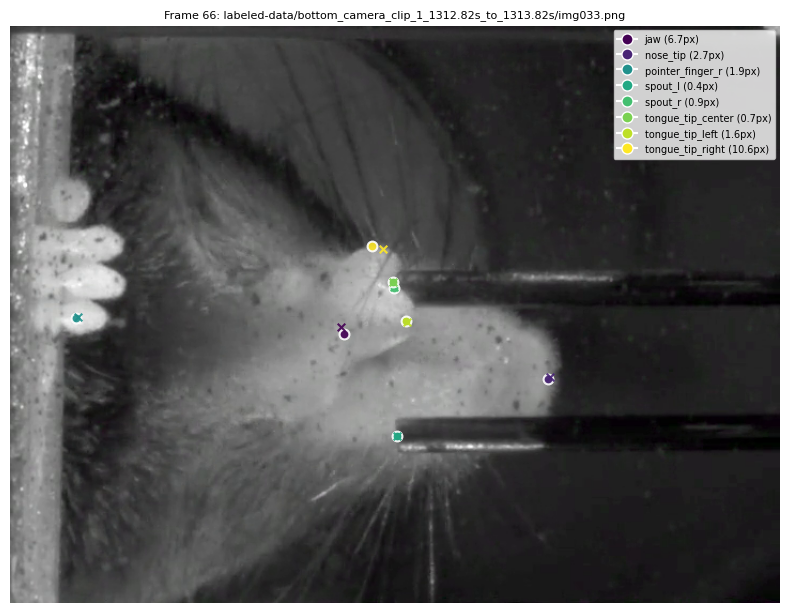

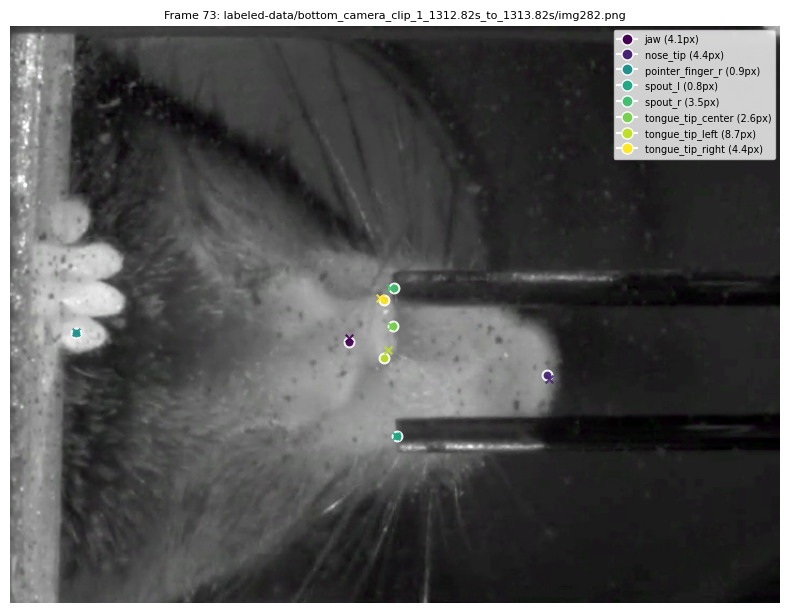

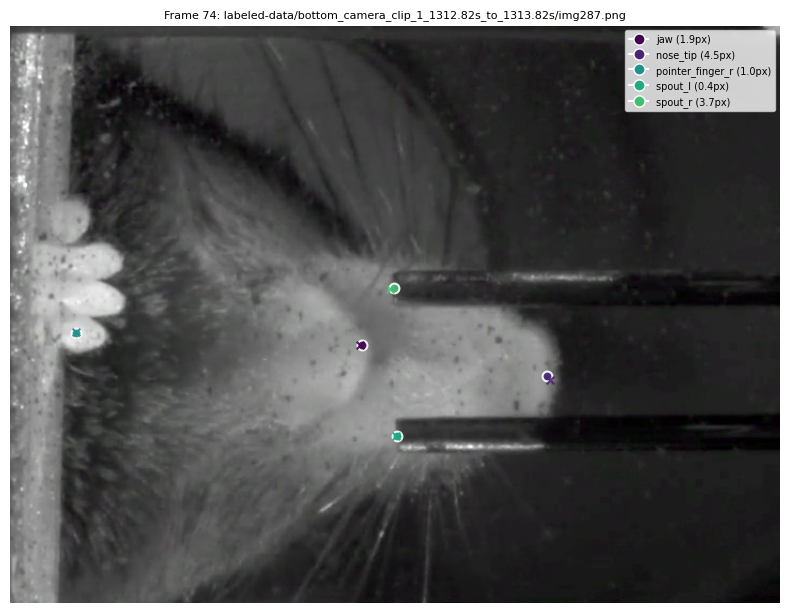

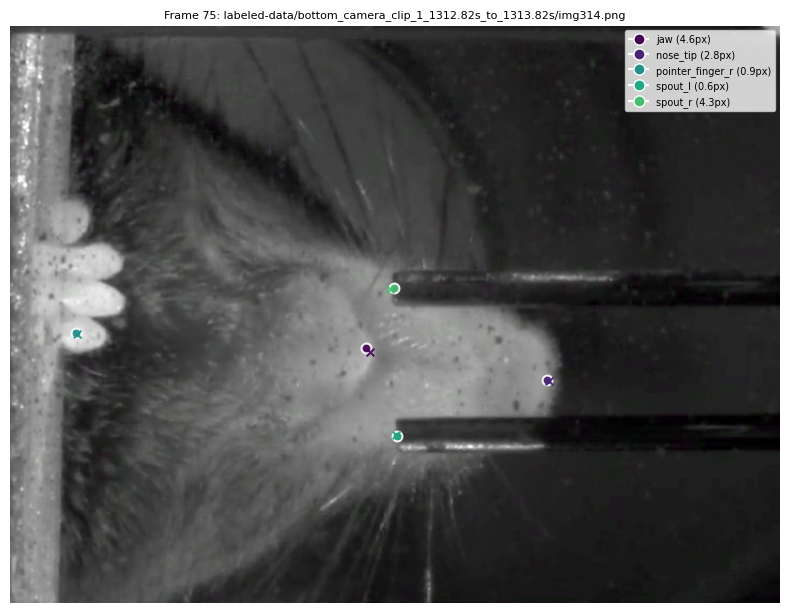

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import cv2
import numpy as np
import pandas as pd

plotting_df = merged_test
base_dir = "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17"

# Get keypoint names
kp_names = sorted({col[:-5] for col in plotting_df.columns if col.endswith("_x_gt")})

# Assign each keypoint a unique color
cmap = plt.colormaps.get_cmap("viridis")
kp_colors = {kp: cmap(i / max(1, len(kp_names) - 1)) for i, kp in enumerate(kp_names)}

# Compute pixel errors
errors = {}
for kp in kp_names:
    dx = plotting_df[f"{kp}_x_pr"] - plotting_df[f"{kp}_x_gt"]
    dy = plotting_df[f"{kp}_y_pr"] - plotting_df[f"{kp}_y_gt"]
    err = np.sqrt(dx**2 + dy**2)
    errors[kp] = err

# Plot
for idx, row in plotting_df.head(10).iterrows():
    img_rel = row["image_path"]
    img_path = os.path.join(base_dir, img_rel)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Couldn’t load {img_path}, skipping")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)

    legend_entries = []

    for i, kp in enumerate(kp_names):
        x_gt, y_gt = row[f"{kp}_x_gt"], row[f"{kp}_y_gt"]
        x_pr, y_pr = row[f"{kp}_x_pr"], row[f"{kp}_y_pr"]
        color = kp_colors[kp]

        if pd.notna(x_gt) and pd.notna(y_gt):
            # Compute error for this frame
            err_val = errors[kp].loc[idx]
            label = f"{kp} ({err_val:.1f}px)"
            
            # GT point
            ax.scatter(x_gt, y_gt, s=50, edgecolor="white", facecolor=color,
                       linewidth=1.5, alpha=0.9)
            # Prediction point
            ax.scatter(x_pr, y_pr, s=30, marker="x", c=[color],
                       linewidth=1.5, alpha=0.9)

            # Add to legend once per kp
            legend_entries.append((plt.Line2D([0], [0], marker='o', color='w',
                                              markerfacecolor=color, markeredgecolor='white',
                                              markersize=8, label=label), label))

    ax.set_title(f"Frame {idx}: {img_rel}", fontsize=8)
    ax.axis("off")

    # Deduplicate and show legend
    handles, labels = zip(*legend_entries)
    ax.legend(handles, labels, loc="upper right", fontsize=7)

    plt.tight_layout()
    plt.show()


In [20]:
merged_with_error['pointer_finger_r_likelihood']

0      0.999912
1      0.999081
2      0.999852
3      0.999769
4      0.999536
         ...   
973    0.000152
974    0.000159
975    0.000152
976    0.000152
977    0.000160
Name: pointer_finger_r_likelihood, Length: 978, dtype: float64

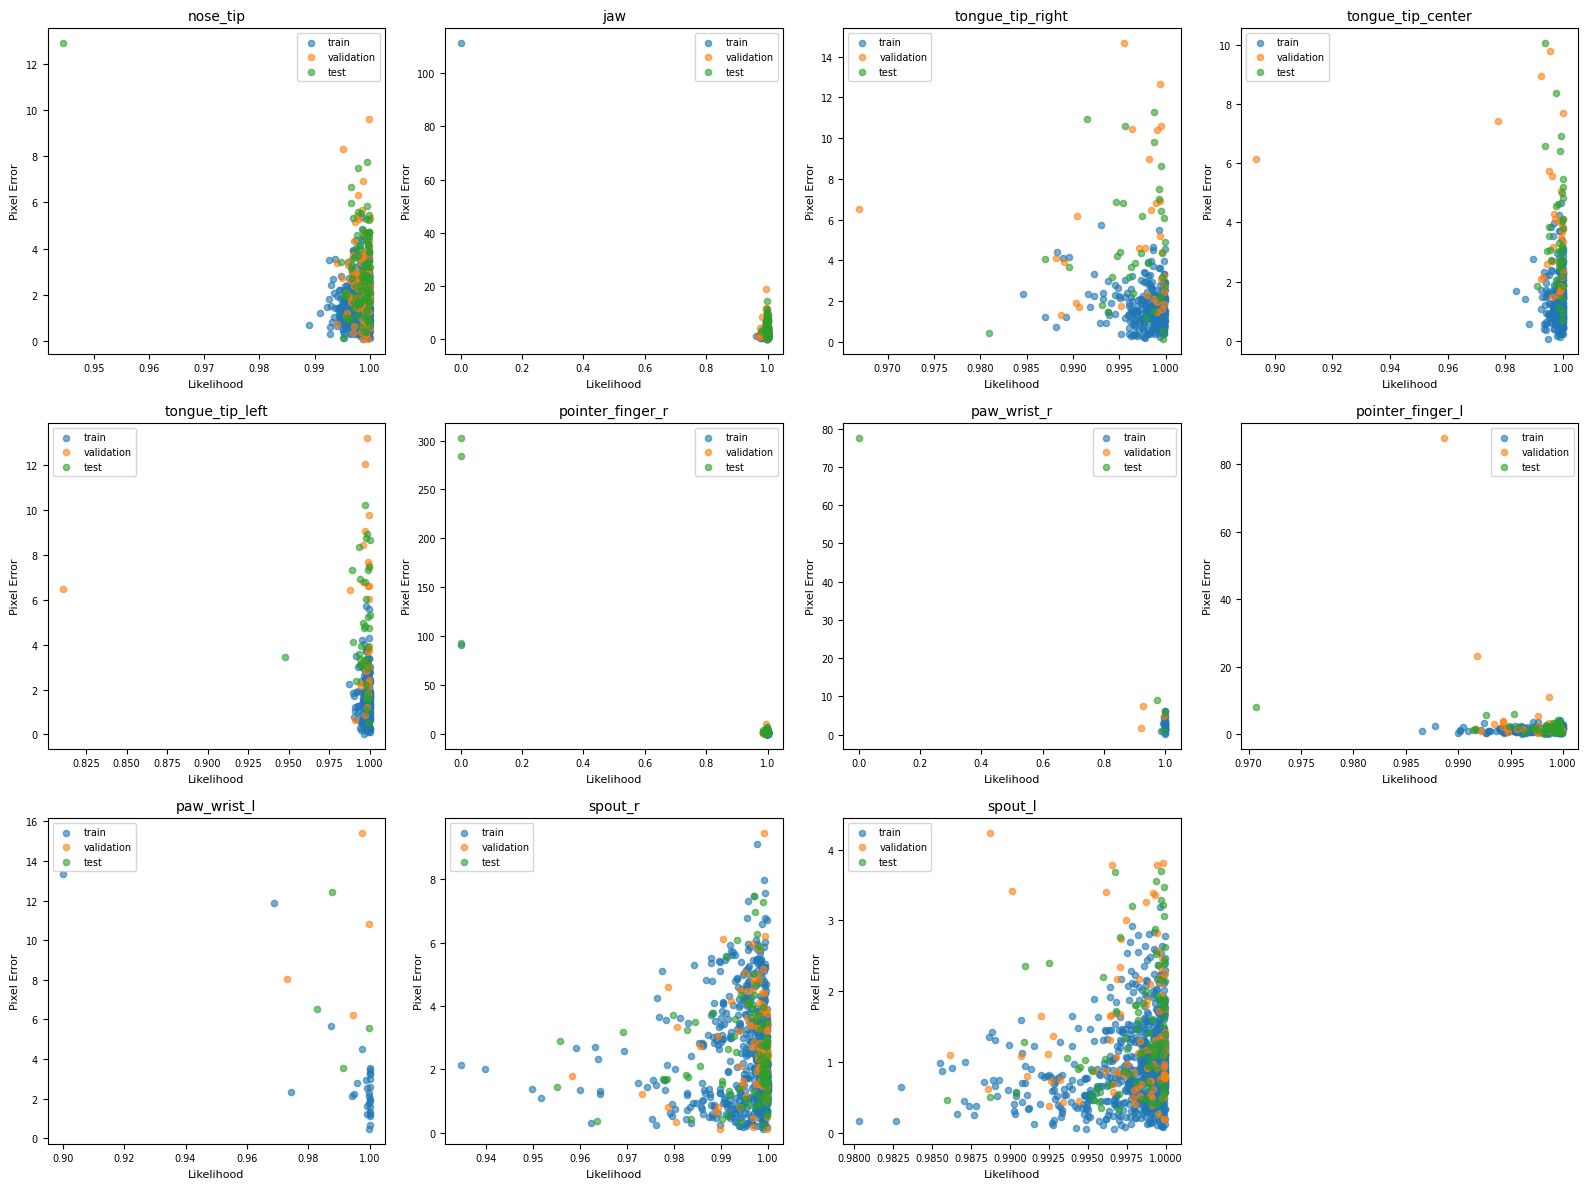

In [22]:
import matplotlib.pyplot as plt

# 1) Identify all the keypoints from your *_pix_error columns
pix_cols = [c for c in merged_with_error.columns if c.endswith("_pix_error")]
kp_names = [c[:-10] for c in pix_cols]  # strip off "_pix_error"

# 2) Prepare a color map for your splits
colors = {"train": "tab:blue", "validation": "tab:orange", "test": "tab:green"}

# 3) Create a grid of subplots
n = len(kp_names)
cols = 4
rows = (n + cols - 1)//cols
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows), squeeze=False)

# 4) Loop over keypoints and axes
for ax, kp in zip(axes.flatten(), kp_names):
    for split, col in colors.items():
        sub = merged_with_error[merged_with_error["set"] == split]
        ax.scatter(
            sub[f"{kp}_likelihood"],
            sub[f"{kp}_pix_error"],
            label=split,
            alpha=0.6,
            color=col,
            s=20
        )
    ax.set_title(kp, fontsize=10)
    ax.set_xlabel("Likelihood", fontsize=8)
    ax.set_ylabel("Pixel Error", fontsize=8)
    ax.tick_params(labelsize=7)
    ax.legend(fontsize=7)
    
# 5) Turn off any unused axes
for ax in axes.flatten()[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


<Axes: xlabel='set', ylabel='tongue_tip_center_pix_error'>

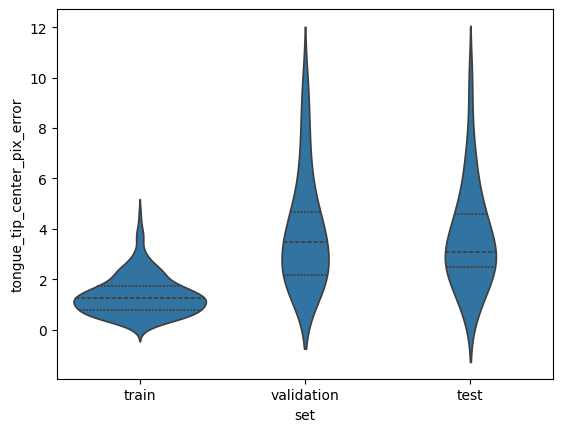

In [24]:
import seaborn as sns
sns.violinplot(
    data=merged_with_error,
    x="set",
    y="tongue_tip_center_pix_error",
    inner="quartile"
)


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract keypoint names robustly (those with _x_gt suffix)
keypoints = sorted([
    col.removesuffix("_x_gt") 
    for col in merged_with_error.columns 
    if col.endswith("_x_gt")
])

# Step 2: Count labeled frames in training set (i.e., non-NaN GT)
train_df = merged_with_error[merged_with_error["set"] == "train"]
labeled_counts = {
    kp: train_df[f"{kp}_x_gt"].notna().sum() 
    for kp in keypoints
}

# Step 3: Compute average likelihood and pixel error in test set
test_df = merged_with_error[merged_with_error["set"] == "test"]
avg_likelihood = {
    kp: test_df[f"{kp}_likelihood"].mean() 
    for kp in keypoints
}
avg_pixel_error = {
    kp: test_df[f"{kp}_pix_error"].mean() 
    for kp in keypoints
}

# Step 4: Create a summary dataframe
summary_df = pd.DataFrame({
    "keypoint": keypoints,
    "labeled_train_frames": [labeled_counts[kp] for kp in keypoints],
    "avg_test_likelihood": [avg_likelihood[kp] for kp in keypoints],
    "avg_test_pixel_error": [avg_pixel_error[kp] for kp in keypoints],
})


In [36]:
summary_df

keypoint  labeled_train_frames  avg_test_likelihood  \
0                 jaw                   781             0.988122   
1            nose_tip                   782             0.998067   
2         paw_wrist_l                    29             0.049196   
3         paw_wrist_r                    32             0.030136   
4    pointer_finger_l                   306             0.403094   
5    pointer_finger_r                   345             0.413116   
6             spout_l                   774             0.997964   
7             spout_r                   774             0.994329   
8   tongue_tip_center                   269             0.373115   
9     tongue_tip_left                   267             0.372106   
10   tongue_tip_right                   267             0.372556   

    avg_test_pixel_error  
0               4.130387  
1               3.014259  
2               7.017608  
3              23.413281  
4               2.025866  
5              17.652802  
6               1.439547  
7               2.521144  
8               3.673723  
9               4.650610  
10              4.594665

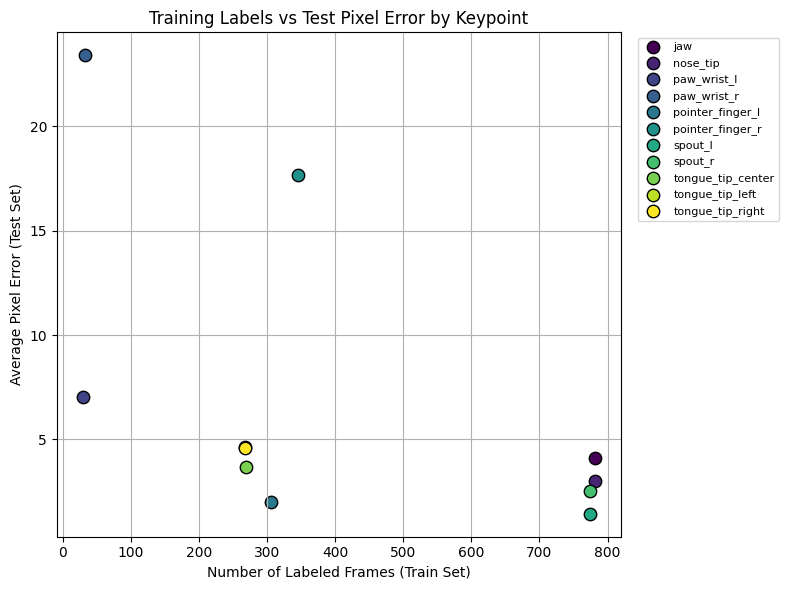

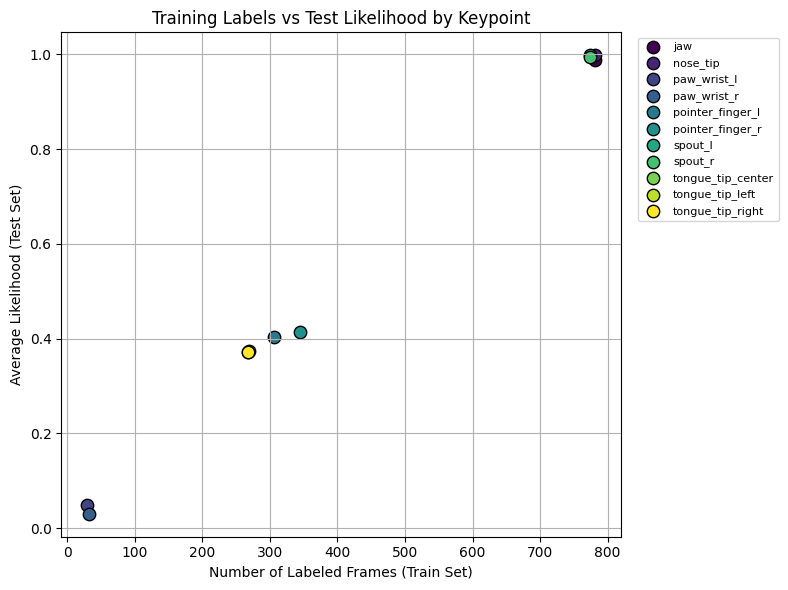

In [37]:
import matplotlib.pyplot as plt

# 1) Assume you already have:
#    summary_df with columns:
#      keypoint, labeled_train_frames, avg_test_likelihood, avg_test_pixel_error

# 2) Prepare keypoint list & colormap
kp_names = summary_df["keypoint"].tolist()
cmap = plt.get_cmap("viridis", len(kp_names))
kp_colors = {kp: cmap(i) for i, kp in enumerate(kp_names)}

# 3a) Plot: Labeled Frames vs. Avg. Test Pixel Error
plt.figure(figsize=(8, 6))
for kp in kp_names:
    row = summary_df[summary_df["keypoint"] == kp].iloc[0]
    plt.scatter(
        row["labeled_train_frames"],
        row["avg_test_pixel_error"],
        color=kp_colors[kp],
        s=80,
        edgecolor="black",
        label=kp
    )

plt.xlabel("Number of Labeled Frames (Train Set)")
plt.ylabel("Average Pixel Error (Test Set)")
plt.title("Training Labels vs Test Pixel Error by Keypoint")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()

# 3b) Plot: Labeled Frames vs. Avg. Test Likelihood
plt.figure(figsize=(8, 6))
for kp in kp_names:
    row = summary_df[summary_df["keypoint"] == kp].iloc[0]
    plt.scatter(
        row["labeled_train_frames"],
        row["avg_test_likelihood"],
        color=kp_colors[kp],
        s=80,
        edgecolor="black",
        label=kp
    )

plt.xlabel("Number of Labeled Frames (Train Set)")
plt.ylabel("Average Likelihood (Test Set)")
plt.title("Training Labels vs Test Likelihood by Keypoint")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


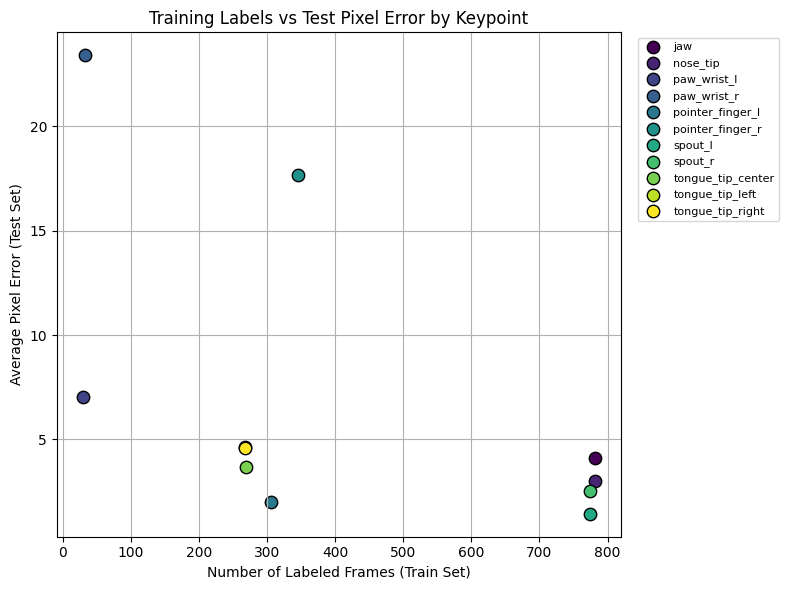

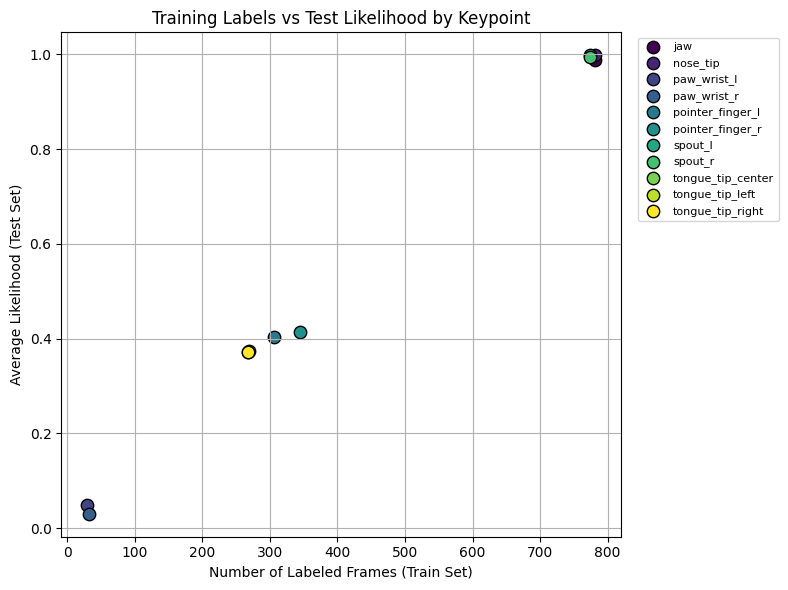

In [34]:
import matplotlib.pyplot as plt

# 1) Keypoint names
kp_names = sorted([
    col[:-5] 
    for col in merged_with_error.columns 
    if col.endswith("_x_gt")
])

# 2) Compute stats
train_df = merged_with_error[merged_with_error["set"] == "train"]
test_df  = merged_with_error[merged_with_error["set"] == "test"]

labeled_counts  = {kp: train_df[f"{kp}_x_gt"].notna().sum() for kp in kp_names}
avg_pixel_error = {kp: test_df[f"{kp}_pix_error"].mean()         for kp in kp_names}
avg_likelihood  = {kp: test_df[f"{kp}_likelihood"].mean()        for kp in kp_names}

# 3) Discrete colormap
cmap = plt.get_cmap("viridis", len(kp_names))
kp_colors = {kp: cmap(i) for i, kp in enumerate(kp_names)}

# 4a) Plot: Labeled Frames vs Pixel Error
plt.figure(figsize=(8, 6))
for kp in kp_names:
    plt.scatter(
        labeled_counts[kp],
        avg_pixel_error[kp],
        color=kp_colors[kp],
        s=80,
        edgecolor="black",
        label=kp
    )

plt.xlabel("Number of Labeled Frames (Train Set)")
plt.ylabel("Average Pixel Error (Test Set)")
plt.title("Training Labels vs Test Pixel Error by Keypoint")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()

# 4b) Plot: Labeled Frames vs Likelihood
plt.figure(figsize=(8, 6))
for kp in kp_names:
    plt.scatter(
        labeled_counts[kp],
        avg_likelihood[kp],
        color=kp_colors[kp],
        s=80,
        edgecolor="black",
        label=kp
    )

plt.xlabel("Number of Labeled Frames (Train Set)")
plt.ylabel("Average Likelihood (Test Set)")
plt.title("Training Labels vs Test Likelihood by Keypoint")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


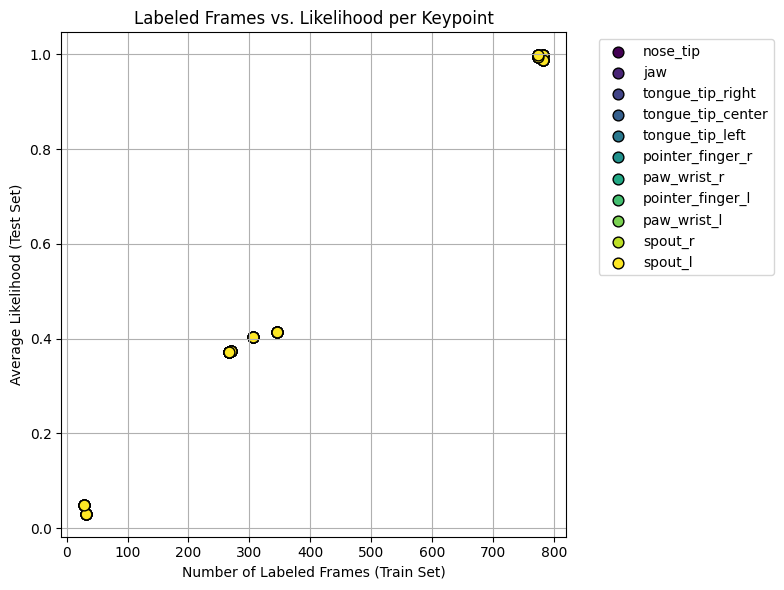

In [31]:
import matplotlib.pyplot as plt

# Prepare data
x_vals = [labeled_counts[kp] for kp in kp_names]
y_vals = [avg_likelihood[kp] for kp in kp_names]

# Assign each keypoint a unique color
cmap = plt.colormaps.get_cmap("viridis")
kp_colors = {kp: cmap(i / max(1, len(kp_names) - 1)) for i, kp in enumerate(kp_names)}

# Set up figure
plt.figure(figsize=(8, 6))
for kp in kp_names:
    plt.scatter(
        x_vals,
        y_vals,
        label=kp,
        color=kp_colors[kp],
        s=60,
        edgecolors='black'
    )

# Labeling
plt.xlabel("Number of Labeled Frames (Train Set)")
plt.ylabel("Average Likelihood (Test Set)")
plt.title("Labeled Frames vs. Likelihood per Keypoint")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()






In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(summary_df["labeled_train_frames"], summary_df["avg_test_pixel_error"])
for i, row in summary_df.iterrows():
    plt.text(row["labeled_train_frames"], row["avg_test_pixel_error"], row["keypoint"], fontsize=8)
plt.xlabel("Labeled Training Frames")
plt.ylabel("Avg. Test Pixel Error")
plt.title("Training Labels vs. Test Pixel Error")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_and_flatten(csv_path: str) -> pd.DataFrame:
    """
    Read a CSV with a two-row MultiIndex header (skip the scorer row),
    flatten column names, and return a DataFrame with `image_path` column.
    """
    df = pd.read_csv(csv_path, skiprows=[0], header=[0,1], index_col=0)
    # Flatten columns
    flat_cols = []
    for first, second in df.columns:
        if first == 'set':
            flat_cols.append('set')
        else:
            flat_cols.append(f"{first}_{second}")
    df.columns = flat_cols
    # Reset index to get image_path column
    df = df.reset_index().rename(columns={'index': 'image_path'})
    return df


def load_data(gt_path: str, pred_path: str, error_path: str) -> pd.DataFrame:
    """
    Load ground truth, predictions, and pixel error CSVs, merge them into one DataFrame.
    """
    gt = read_and_flatten(gt_path)
    pr = read_and_flatten(pred_path)

    # Merge GT and predictions
    merged = gt.merge(pr, on='image_path', suffixes=('_gt', '_pr'))

    # Load pixel error CSV (precomputed)
    pix = pd.read_csv(error_path)
    pix.rename(columns={pix.columns[0]: 'image_path'}, inplace=True)
    # append suffix to each kp pix error col
    pix = pix.rename(columns={c: f"{c}_pix_error" for c in pix.columns if c not in ['image_path', 'set']})

    merged = merged.merge(pix, on='image_path', how='left', validate='one_to_one')

    # Consolidate 'set' columns
    if 'set_x' in merged.columns and 'set_y' in merged.columns:
        assert (merged['set_x'] == merged['set_y']).all(), "Set labels mismatch"
        merged['set'] = merged['set_x']
        merged.drop(columns=['set_x', 'set_y'], inplace=True)
    return merged


def compute_error_confidence(df: pd.DataFrame) -> pd.DataFrame:
    """
    From the merged DataFrame, build a long-form table using precomputed pixel errors:
    columns: image_path, set, keypoint, error (from CSV), likelihood.
    """
    # Identify keypoint names
    kp_names = sorted({col[:-10] for col in df.columns if col.endswith('_pix_error')})
    records = []
    for _, row in df.iterrows():
        for kp in kp_names:
            # Only include frames with GT
            x_gt = row.get(f"{kp}_x_gt")
            if pd.isna(x_gt):
                continue
            # Use precomputed pixel error
            err = row.get(f"{kp}_pix_error", np.nan)
            # Likelihood
            lik = row.get(f"{kp}_likelihood", np.nan)

            records.append({
                'image_path': row['image_path'],
                'set': row['set'],
                'keypoint': kp,
                'error': err,
                'likelihood': lik
            })
    return pd.DataFrame(records)


def plot_scatter(df_long: pd.DataFrame, x: str, y: str, hue: str = 'set', title: str = None):
    """
    Generic scatter plot for long-form DataFrame.
    """
    plt.figure(figsize=(8, 6))
    for grp, grp_df in df_long.groupby(hue):
        plt.scatter(grp_df[x], grp_df[y], alpha=0.5, label=grp)
    plt.xlabel(x)
    plt.ylabel(y)
    if title:
        plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()




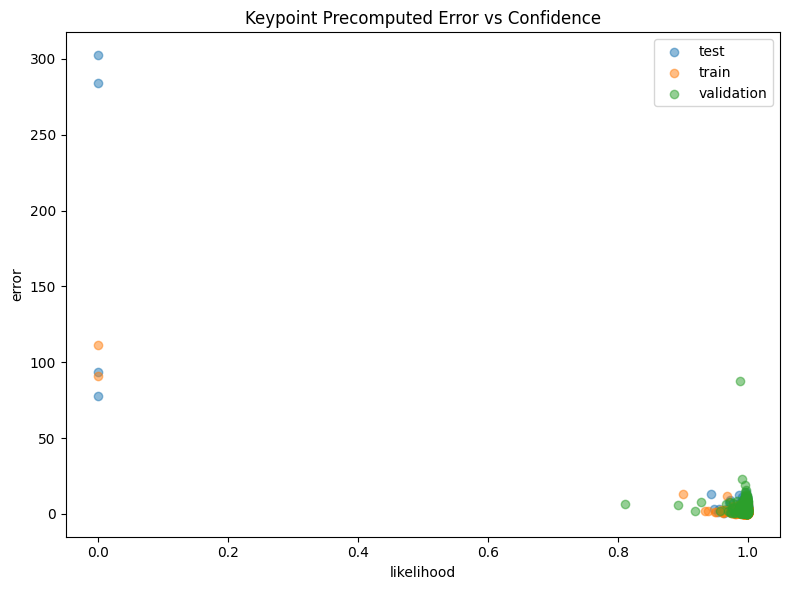

             keypoint  mean_error  mean_likelihood  count_labels
0                 jaw    2.422921         0.996741           976
1            nose_tip    1.784063         0.998390           978
2         paw_wrist_l    4.254470         0.992830            37
3         paw_wrist_r    4.946894         0.968092            39
4    pointer_finger_l    1.650373         0.997717           383
5    pointer_finger_r    3.483334         0.988109           435
6             spout_l    1.042688         0.997862           968
7             spout_r    2.422033         0.995807           968
8   tongue_tip_center    1.859231         0.997772           337
9     tongue_tip_left    2.158190         0.997313           334
10   tongue_tip_right    2.323085         0.997557           334


In [19]:
%matplotlib inline

# Define file paths
base = '/root/capsule/data/BottomViewPylon1-MIB-2025-02-17'
gt_path = os.path.join(base, 'CollectedData.masked.csv')
pred_path = os.path.join(base, 'outputs/predictions.csv')
err_path = os.path.join(base, 'outputs/predictions_pixel_error.csv')

# Load and merge data
merged = load_data(gt_path, pred_path, err_path)

# Build long-form DataFrame using CSV errors
long_df = compute_error_confidence(merged)

# Plot precomputed pixel error vs likelihood
plot_scatter(
    long_df,
    x='likelihood',
    y='error',
    hue='set',
    title='Keypoint Precomputed Error vs Confidence'
)

# Summary by keypoint
summary = (
    long_df.groupby('keypoint')
    .agg(
        mean_error=('error', 'mean'),
        mean_likelihood=('likelihood', 'mean'),
        count_labels=('likelihood', 'count')
    )
    .reset_index()
)
print(summary)
